In [1]:
# 数据集生成函数的创建与使用

In [3]:
# 随机模块
import random

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# numpy
import numpy as np

# pytorch
import torch
from torch import nn,optim
import torch.nn.functional as F
from torch.utils.data import Dataset,TensorDataset,DataLoader

In [4]:
# 回归类数据集

In [6]:
# 手动生成数据
# 生成两个特征，存在偏差，自变量和因变量存在线性关系的数据集

In [11]:
num_inputs = 2     # 两个特征
num_examples = 1000 #一千条数据

In [12]:
torch.manual_seed(420)

In [13]:
# 线性方程系数
w_true = torch.tensor([2.,-1]).reshape(2,1)
b_true = torch.tensor(1.)

In [15]:
# 特征和标签取值
features = torch.randn(num_examples,num_inputs)
labels_true = torch.mm(features,w_true) + b_true # y = 2x1 - x2 +1
labels = labels_true + torch.randn(size = labels_true.shape) * 0.01

In [16]:
features[:10]

tensor([[-0.7976,  0.4897],
        [-0.1422, -1.7052],
        [-1.0929, -0.1755],
        [ 0.9089, -1.5954],
        [-0.2698, -0.6955],
        [-0.6164, -1.4648],
        [-0.3884,  1.0140],
        [ 0.3666, -0.8173],
        [-0.3075, -0.8645],
        [-0.8863,  1.4295]])

In [17]:
labels[:10]

tensor([[-1.0810],
        [ 2.4157],
        [-1.0135],
        [ 4.4037],
        [ 1.1564],
        [ 1.2391],
        [-0.7691],
        [ 2.5572],
        [ 1.2539],
        [-2.1867]])

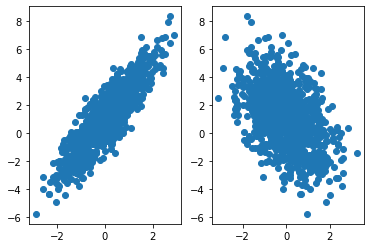

In [18]:
plt.subplot(121) # 一行两列的第一个子图
plt.scatter(features[:,0],labels) #第一个特征和标签的关系
plt.subplot(122) # 一行两列的第二个子图
plt.scatter(features[:,1],labels) #第二个特征和标签的关系

In [19]:
# 要增加线性模型的建模难度，可以增加扰动项的数值比例，从而削弱线性关系

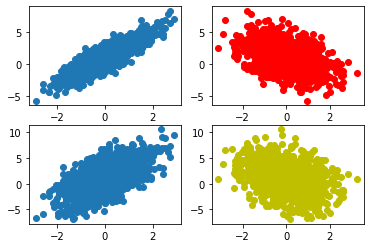

In [21]:
torch.manual_seed(420)

# 修改因变量 
# randn:生成服从标准正态分布的
labels1 = labels_true + torch.randn(size = labels_true.shape) * 2

# 可视化展示

# 扰动较小的情况
plt.subplot(221)
plt.scatter(features[:,0],labels)
plt.subplot(222)
plt.plot(features[:,1],labels,'ro')

# 扰动较大的情况
plt.subplot(223)
plt.scatter(features[:,0],labels1)
plt.subplot(224)
plt.plot(features[:,1],labels1,'yo')

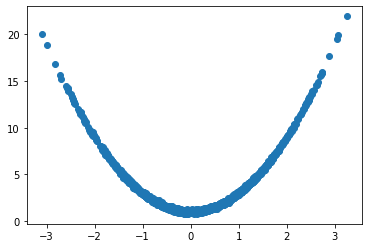

In [23]:
# 设置随机数种子
torch.manual_seed(420)

num_inputs = 2
num_examples = 1000

# 线性方程系数
w_true = torch.tensor(2.)
b_true = torch.tensor(1.)

# 特征和标签取值
features = torch.randn(num_examples,num_inputs)
labels_true = torch.pow(features,2) * w_true + b_true
labels = labels_true + torch.randn(size = labels_true.shape) * 0.1

# features和labels的线性关系
plt.scatter(features,labels)

In [24]:
# 创建生成回归类数据的函数

In [78]:
def tensorGenReg(num_examples = 1000,w = [2,-1,1],bias = True,delta = 0.01,deg = 1):
    """回归类数据集创建函数
    
    param num_examples:创建数据集的数据量
    param w:包括截距的特征系数向量
    param bias:是否需要截距
    param delta:扰动项取值
    param def:方程次数
    return :生成的特征张量和标签张量
    
    """
    if bias == True:
        num_inputs = len(w) - 1     # 特征数量
        features_true = torch.randn(num_examples,num_inputs) # 不包含全是1的列的特征张量
        w_true = torch.tensor(w[:-1]).reshape(-1,1).float()  # 自变量系数
        b_true = torch.tensor(w[-1]).float()                 # 截距
        if num_inputs == 1:                                  # 如果特征只有一个，不能使用矩阵乘法，需要特殊处理
            labels_true = torch.pow(features_true,deg) * w_true + b_true
        else:
            labels_true = torch.mm(torch.pow(features_true,deg),w_true) + b_true
        features = torch.cat((features_true,torch.ones(len(features_true),1)),1) # 在特征张量的最后添加一列全是1的列
        labels = labels_true + torch.randn(size = labels_true.shape) * delta
        
    else:
        num_inputs = len(w)
        features = torch.randn(num_examples,num_inputs)
        w_true = torch.tensor(w).reshape(-1,1).float()
        if num_inputs ==1:
            labels_true = torch.pow(features,deg) + w_true
        else:
            labels_true = torch.mm(torch.pow(features,deg),w_true)
        labels = labels_true + torch.randn(size = labels_true.shape) * delta
        
    return features,labels

# 该函数无法创建带有交叉项的方程 eg:deg>=2 y=x1^2 + x1x2(交叉项) + x2^2

In [81]:
# 测试数据集
torch.manual_seed(420)

features,labels = tensorGenReg()
features,labels

(tensor([[-0.0070,  0.5044,  1.0000],
         [ 0.6704, -0.3829,  1.0000],
         [ 0.0302,  0.3826,  1.0000],
         ...,
         [-0.9164, -0.6087,  1.0000],
         [ 0.7815,  1.2865,  1.0000],
         [ 1.4819,  1.1390,  1.0000]]),
 tensor([[ 4.7349e-01],
         [ 2.7285e+00],
         [ 6.7642e-01],
         [-7.5372e-01],
         [ 4.1722e+00],
         [ 6.0236e+00],
         [ 3.2936e+00],
         [ 3.6706e+00],
         [ 5.2819e-01],
         [ 1.4557e+00],
         [ 3.2307e+00],
         [ 3.7176e+00],
         [-9.2519e-01],
         [ 2.1403e+00],
         [ 4.4702e+00],
         [-1.4073e-01],
         [ 4.5678e+00],
         [ 2.4188e+00],
         [-1.0326e+00],
         [ 1.1065e+00],
         [ 2.7326e+00],
         [ 6.0257e-01],
         [ 6.7595e-01],
         [-4.6197e-01],
         [ 2.1618e+00],
         [ 4.7292e+00],
         [ 2.0886e+00],
         [-4.1371e+00],
         [ 2.5796e+00],
         [ 1.5762e+00],
         [ 2.6435e-01],
         [ 2

In [27]:
# 分类数据集

In [28]:
torch.randn(4,2)

tensor([[-0.1427,  1.0932],
        [-0.4401,  0.7664],
        [ 1.1842,  0.6076],
        [ 1.5217,  0.3556]])

In [29]:
torch.normal(4,2,size=(10,2)) # normal(均值，标准差)

tensor([[ 1.1617,  2.0312],
        [ 2.8536,  3.1949],
        [-0.3619,  6.6418],
        [ 1.3033,  4.7424],
        [ 6.5892, -0.1761],
        [ 3.7970,  2.1100],
        [ 6.4112,  3.3882],
        [ 2.2064,  4.7490],
        [ 1.8870,  2.4916],
        [ 1.4635,  6.8815]])

In [30]:
# 两个特征，三分类，每个类别500条数据

In [43]:
torch.manual_seed(420)

# 创建初始标记值
num_inputs = 2
num_examples = 500

# 创建自变量簇
data0 = torch.normal(4,2,size=(num_examples,num_inputs))
data1 = torch.normal(-2,2,size=(num_examples,num_inputs))
data2 = torch.normal(6,2,size=(num_examples,num_inputs))

# 创建标签
label0 = torch.zeros(500)
label1 = torch.ones(500)
label2 = torch.full_like(label1,2) #(形状，填充数字)

# 合并生成最终数据
features = torch.cat((data0,data1,data2)).float()
labels = torch.cat((label0,label1,label2)).long().reshape(-1,1) # 标签变为列向量

In [44]:
features[:10]

tensor([[3.9859, 5.0089],
        [5.3407, 3.2343],
        [4.0605, 4.7653],
        [2.9738, 5.4208],
        [7.6183, 4.8705],
        [9.2907, 4.5307],
        [5.8470, 3.1249],
        [8.0364, 6.6997],
        [3.4954, 3.9290],
        [3.8709, 2.8165]])

In [45]:
labels[:10]

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])

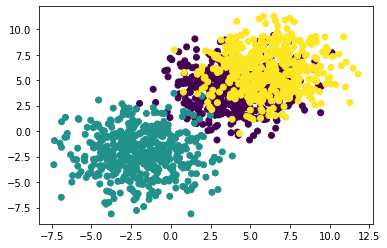

In [46]:
# 可视化展示
# 使用scatter进行绘图速度更快
# xy为两个特征
plt.scatter(features[:,0],features[:,1],c=labels)

In [47]:
# 数据集交错情况越少，建模难度越低
# 数据集中心点与均值方差有关，相差越大，间距越大，交错程度可能越小

In [50]:
torch.manual_seed(420)

# 创建初始标记值
num_inputs = 2
num_examples = 500

# 创建自变量簇
data0 = torch.normal(3,2,size=(num_examples,num_inputs))
data1 = torch.normal(0,2,size=(num_examples,num_inputs))
data2 = torch.normal(-3,2,size=(num_examples,num_inputs))

# 创建标签
label0 = torch.zeros(500)
label1 = torch.ones(500)
label2 = torch.full_like(label1,2) #(形状，填充数字)

# 合并生成最终数据
features1 = torch.cat((data0,data1,data2)).float()
labels1 = torch.cat((label0,label1,label2)).long().reshape(-1,1) # 标签变为列向量

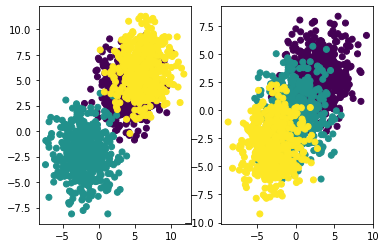

In [51]:
# 可视化展示
plt.subplot(121)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.subplot(122)
plt.scatter(features1[:,0],features1[:,1],c=labels1)

In [52]:
# 第二个图相比较第一个交错数据更多，建模难度更高

In [54]:
def tensorGenCla(num_example = 500,num_inputs = 2,num_class = 3,deg_dispersion = [4,2],bias = False):
    """分类数据集创建函数
    
    param num_examples:每个类别的数据量
    param num_inputs:数据集特征数量
    param num_class:数据集标签类别总数
    param deg_dispersion:数据分布离散程度参数，需要输入一个列表，其中第一个参数表示每个类别数组均值的参考、第二个参数表示随机数组标准差。
    param bias:建立模型逻辑回归模型时，是否带入截距
    return :生成的特征张量和标签张量，其中特征张量是浮点型二维数组，标签张量是长正型二维数组
    
    """
    
    cluster_1 = torch.empty(num_examples,1)   #每一类标签张量的形状
    mean_ = deg_dispersion[0]                 #每一类特征张量的均值的参考值
    std_ = deg_dispersion[1]                  #每一类特征张量的方差
    lf = []                                   #用于存储每一类特征张量的列表容器
    ll = []                                   #用于存储每一类标签张量的列表容器
    k = mean_ * (num_class-1) / 2             #每一类特征张量均值的惩罚引子
    
    for i in range(num_class):
        data_temp = torch.normal(i*mean_ - k, std_, size=(num_examples, num_inputs))   #生成每一类张量
        lf.append(data_temp)                                                          #将每一类张量添加到lf中
        labels_temp = torch.full_like(cluster_1,i)                                    #生成类的标签
        ll.append(labels_temp)                                                        #将每一类标签添加到ll中
        
    features = torch.cat(lf).float()
    labels = torch.cat(ll).long()
    
    if bias == True:
        features = torch.cat((features,torch.ones(len(features),1)),1)                #在特征张量中添加全是1的列
    
    return features,labels

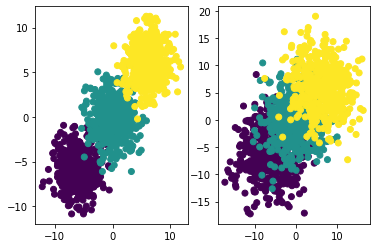

In [56]:
# 测试函数性能

# deg_dispersion = [数字1,数字2]
# 在使用函数的过程中，离散度的数字1可以理解为簇的大概分布区间，数字2可以理解为每个簇的离散程度


torch.manual_seed(420)

# 创建数据
f,l = tensorGenCla(deg_dispersion = [6,2])     # 离散程度较小
fl,ll = tensorGenCla(deg_dispersion = [6,4])   # 离散程度较大

# 绘制图像查看
plt.subplot(121)
plt.scatter(f[:,0],f[:,1],c=l)

plt.subplot(122)
plt.scatter(fl[:,0],fl[:,1],c=ll)

In [67]:
# 创建小批量切分函数

def data_iter(batch_size,features,labels):
    """数据切分函数
    
    param batch_size: 每个子数据集包含多少数据
    param features: 输入的特征张量
    param labels: 输入的标签张量
    return l: 包含batch_size个列表，每个列表由切分后的特征和标签所组成
    
    """
    
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    l = []
    
    for i in range(0,num_examples,batch_size): # 等差数列 ，i的间隔为batch_size
        j = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        # torch.index_select(input, dim, index, out=None) 
        l.append([torch.index_select(features,0,j),torch.index_select(labels,0,j)])
        
    return l

In [68]:
features,labels = tensorGenCla()

In [72]:
l = data_iter(10,features,labels)

In [73]:
l[0]

[tensor([[-1.4161,  1.6244],
         [ 2.7692, -2.1367],
         [-5.3656, -5.8026],
         [ 6.0802,  2.2467],
         [ 6.4582,  5.8087],
         [ 0.3643,  2.1673],
         [-4.0128, -4.9352],
         [ 5.0251,  3.7271],
         [ 2.1005, -0.3147],
         [-3.3229,  3.9431]]),
 tensor([[1],
         [1],
         [0],
         [2],
         [2],
         [1],
         [0],
         [2],
         [1],
         [1]])]

In [75]:
features.shape

torch.Size([1500, 2])

In [76]:
torch.index_select(features,0,torch.tensor([3,2]))

tensor([[-5.2566, -4.3498],
        [-4.9393, -4.6056]])

In [77]:
# 深度学习领域不推荐这么切分数据
# 深度学习往往数据量非常大，甚至数据本身分布式存储，要调取完整数据查看，会浪费大量存储空间以及消耗一定的算力。
# 因此 Pytorch 的 Dataset 和 DataLoader 都是将数据进行迭代存储或者映射存储。

In [ ]:
# Python 模块编写
# 存储为.py文件 import进来